<a href="https://colab.research.google.com/github/jessikamorais/Metodos_Numericos/blob/main/M%C3%B3dulo_2_Exerc%C3%ADcio_10_ITEM_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RESOLUÇÃO DO ITEM 3.**



**Resolução do exercício 10_Artigo**: "*A Collection of 10 Numerical Problems in Chemical Engineering Solved by Various mathematical Software Packages*".

O problema consiste em um tanque agitado com aquecimento que opera de forma contínua e possui um contralador PI.

As equações para modelagem do sistema e controle são apresentadas a seguir:

____

$\frac{dT}{dt}=\frac{WC_p(T_i-T) + q}{\rho VC_{p}}$ ___ Equação A.40  
_____

$T_o(t) = t(T-\tau_d)$ ___ Equação A.41

____

$\frac{dT_o}{dt} = [T - T_o - (\frac{\tau _d}{2})(\frac{dT}{dt})] \frac{2}{\tau _d}$ ___Equação A.42
____

$\frac{dT_m}{dt}=\frac{T_o-T_m}{\tau_m}$ ___ Equação A.43

____

$q_{s}=WC_p(T_r - Tis)$ ___ Equação A.45

____

$\frac{d}{dT}(errsum)= T_r - T_m $ ___ Equação A.46

____

$q = Q_s + K_c(T_r - T-m) + \frac{K_c}{\tau _I}(errsum)$ ___ Equação A.47

____

**Item 4**. O exercício foi resolvido considerando que o termo $\frac{K_c}{\tau _I} = 0$. Desta forma, apenas o controle proporcional irá agir sobre o sistema.   
Neste caso, como apresentado na Figura 2, pode-se perceber uma maior estabilização das temperaturas após 75 minutos de inicialização do tanque. Porém, a temperatura se estabiliza em 100°C e não em 80°C que é o valor desejado (Set-Point).

In [1]:
#Importando as bibliotcas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint
from pylab import *

In [2]:
#Importando a pasta do github que será utilizada:
!git clone https://github.com/jessikamorais/Metodos_Numericos #clonar do Github
%cd Metodos_Numericos

Cloning into 'Metodos_Numericos'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (67/67), done.
Unpacking objects: 100% (73/73), done.
remote: Total 73 (delta 28), reused 0 (delta 0), pack-reused 0
/content/Metodos_Numericos


In [3]:
#Definindo as variáveis necessárias:

termo1 = 4000.0 #ro*V*Cp [kJ/°C]
Tis = 60 #Constante de tempo integral [°C]
TauD = 1 #Tempo morto, tempo que o sistema demora para atingir a T de Set point[min]
Kc = 500 #Ganho proporcional [kJ/min °C]
termo2 = 500 # W*Cp [kJ/min °C] 
Tr = 80 #[°C] #Temperatura do SetPoint
TauM = 5 #[min] #Constante de tempo do termopar
TauI = 2 #[min]
t_plot = []
T_plot = []
ToPade_plot = []
Tm_plot = []



#Tm = #Temperatura lida no termopar [°C]
#To = #Temperatura de saída do tanque ou temperatura que entra no termopar
#Ti = #Temperatura de entrada
#Tis = #Temperatura de projeto de estado estacionário

#Condição inicial do sistema (t= 0 min):
T0 = Tr
To0Pade = Tr #É o valor To calculado com a aproxição de Padé
Tm0 = Tr
derrsum0 = 0.0
Ti = 60.0

In [4]:
def model(Resp, t):

  # Definindo as equações utilizadas:
  T, ToPade, Tm, derrsum  = Resp[0], Resp[1], Resp[2], Resp[3]
  #To = T*(t - TauD) #Expressão para o tempo morto
  qs = termo2*(Tr-Ti) #Calor necessário para atingir o Set Point
  q = qs + Kc*(Tr-Tm) #Alterando a equação para o item 4, em que Kc/TauI = 0, o termo "(Kc/TauI)*derrsum" será anulado.

  # Definindo as Equações Diferenciais utilizadas:
  dT  = (termo2/(Ti-T)+q)/(termo1)
  dToPade = ((T - ToPade) - (TauD/2)*(dT))/(2/TauD) #Calculo para o efeito do tempo morto (aproximação de Padé)
  dTm = ((ToPade - Tm)/TauM) #Modelagem do termopar
  derrsum = (Tr - Tm) #Nova variável para calcular a integral de q
  
  #Capturando os valores para a construção de gráficos:
  t_plot.append(t)
  T_plot.append(T)
  ToPade_plot.append(ToPade)
  Tm_plot.append(Tm)

  return [dT, dToPade, dTm, derrsum]

In [5]:
#Importando a função de Runge Kutta de ordem 4:
from rk4_sys import rk4

In [6]:
# Resolvendo pelo Método de Runge Kutta de ordem 4:

t0 = 0.0
x0 = [T0, To0Pade, Tm0, derrsum0] 
tf = 200.0

t, x = rk4( model, t0, tf,x0)



**Plotando os gráficos das temperaturas  T ,  To  e  Tm  em função do tempo.** *Figura 1*         
   

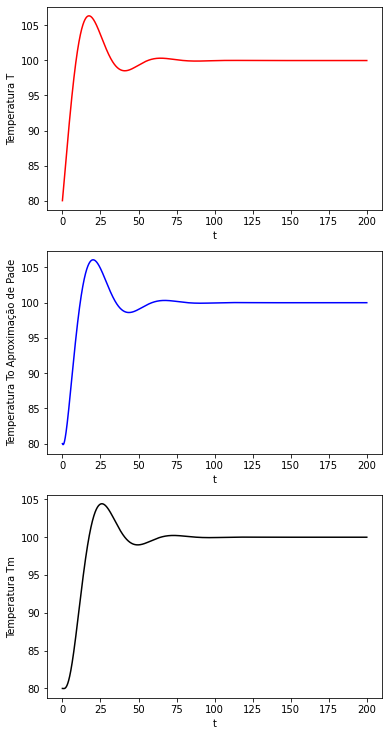

In [7]:
# Plotando os gráficos de temperatura com relação ao tempo:

fig, axs = plt.subplots(3)

#Plotando o gráfico de T em relação ao tempo:
axs[0].plot(t, x[:, 0], 'r')
axs[0].set(xlabel='t', ylabel='Temperatura T')

#Plotando o gráfico de To em relação ao tempo:
axs[1].plot(t, x[:, 1], 'b')
axs[1].set(xlabel='t', ylabel="Temperatura To Aproximação de Pade")

#Plotando o gráfico de Tm em relação ao tempo:
axs[2].plot(t, x[:, 2], 'k')
axs[2].set(xlabel='t', ylabel="Temperatura Tm")

#Ajustando o tamanho dos gráficos
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=2.5, 
                    wspace=0.8, 
                    hspace=0.2)
plt.show()

**Plotando um único gráfico para a comparação das temperaturas  T ,  To  e  Tm  em função do tempo.** *Figura 2*         



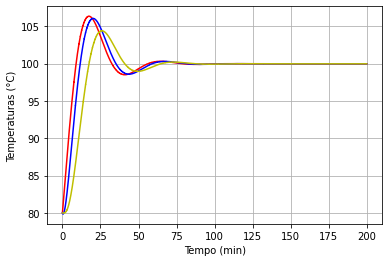

In [8]:
# Plotando o gráfico de temperaturas com relação ao tempo:

figure()
plot(t_plot, T_plot,'-r',t_plot, ToPade_plot,'-b',t_plot, Tm_plot,'-y')
ylabel('Temperaturas (°C)')
xlabel('Tempo (min)')
grid()